# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [643]:
% matplotlib inline
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data into a DataFrame
# pd.read_csv()

## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")
df = pd.read_csv("../Iowa_Liquor_sales_sample_10pct.csv")
print df.columns
df.head()

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [645]:
[(c, df[c].value_counts().count()) for c in list(df.columns)]

[('Date', 274),
 ('Store Number', 1400),
 ('City', 385),
 ('Zip Code', 415),
 ('County Number', 99),
 ('County', 99),
 ('Category', 83),
 ('Category Name', 71),
 ('Vendor Number', 116),
 ('Item Number', 2696),
 ('Item Description', 2173),
 ('Bottle Volume (ml)', 29),
 ('State Bottle Cost', 1086),
 ('State Bottle Retail', 1112),
 ('Bottles Sold', 137),
 ('Sale (Dollars)', 6580),
 ('Volume Sold (Liters)', 265),
 ('Volume Sold (Gallons)', 261)]

In [646]:
df.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [647]:
col_str = ['City','County','Category Name','Item Description']
for col in col_str :
    df[col] = df[col].str.upper()

Let's delete the '$' and make it float.

In [648]:
cols = ['State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)']
for col in cols :
    df[col] = df[col].str.replace('$','').astype(float)

In [649]:
df.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [650]:
df['Date'] = pd.to_datetime(df['Date'])

Checking the two similar columns 'Volume Sold (Liters)' and 'Volume Sold (Gallons)' and see if they represent the same measurement.

In [651]:
(df['Volume Sold (Liters)'] / df['Volume Sold (Gallons)']).describe()

count    270955.000000
mean          3.783352
std           0.026625
min           3.333333
25%           3.779528
50%           3.781513
75%           3.790614
max           4.000000
dtype: float64

It seems so but there are significant deviations. Ideally the ratio should be the same. Let's dig deeper to explore the the extreme ends.

In [652]:
df[(df['Volume Sold (Liters)'] / df['Volume Sold (Gallons)']) <3.4].sample(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
154384,2015-06-11,2587,JOHNSTON,50131,77.0,POLK,1081600.0,WHISKEY LIQUEUR,421,64870,FIREBALL CINNAMON WHISKY,100,0.89,1.34,1,1.34,0.1,0.03
173946,2015-07-15,3650,HOLSTEIN,51025,47.0,IDA,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,55,44215,BARTON LIGHT RUM,100,0.89,1.34,1,1.34,0.1,0.03
40738,2015-05-19,5136,DES MOINES,50322,77.0,POLK,1052010.0,IMPORTED GRAPE BRANDIES,389,49182,REMY MARTIN VSOP,100,3.24,4.86,1,4.86,0.1,0.03
257786,2016-01-12,5176,CEDAR RAPIDS,52405,57.0,LINN,1052010.0,IMPORTED GRAPE BRANDIES,389,49182,REMY MARTIN VSOP,100,3.24,4.86,1,4.86,0.1,0.03
127302,2015-12-15,5176,CEDAR RAPIDS,52405,57.0,LINN,1052010.0,IMPORTED GRAPE BRANDIES,389,49182,REMY MARTIN VSOP,100,3.24,4.86,1,4.86,0.1,0.03


In [653]:
df[(df['Volume Sold (Liters)'] / df['Volume Sold (Gallons)']) == 4].sample(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
108946,2015-12-15,3443,COUNCIL BLUFFS,51503,78.0,POTTAWATTAMIE,1051010.0,AMERICAN GRAPE BRANDIES,115,53213,PAUL MASSON GRANDE AMBER BRANDY,200,1.96,2.94,1,2.94,0.2,0.05
34657,2015-07-30,3920,CLINTON,52732,23.0,CLINTON,1032200.0,IMPORTED VODKA - MISC,260,64759,CIROC RED BERRY,200,5.00,7.50,1,7.50,0.2,0.05
163678,2015-12-22,3573,OTTUMWA,52501,90.0,WAPELLO,1032200.0,IMPORTED VODKA - MISC,260,64510,CIROC APPLE,200,5.00,7.50,1,7.50,0.2,0.05
184302,2015-08-05,4717,BETTENDORF,52722,82.0,SCOTT,1032080.0,IMPORTED VODKA,35,34359,GREY GOOSE VODKA,200,5.00,7.50,1,7.50,0.2,0.05
244607,2015-07-07,2620,WINDSOR HEIGHTS,50311,77.0,POLK,1011200.0,STRAIGHT BOURBON WHISKIES,65,19063,JIM BEAM,200,3.41,5.12,1,5.12,0.2,0.05


Okay, it is rounding error. Gallon is a more refined measurement unit, but we have bottle in ml. So, let's use litre.

In [654]:
df.drop('Volume Sold (Gallons)',axis=1, inplace = True)

In [655]:
 pd.options.display.max_rows = 999

Let's examine the first couple ones by eyes and compare to the Zip Code csv downloaded. Programming has limitations too. Let' check validity of the Zip Code.

In [656]:
df['Zip Code'].value_counts().sort_index()

50002      43
50003     318
50006     122
50009    2113
50010    7091
50014     457
50020     149
50021    2527
50022    1045
50023    2309
50025     209
50028      58
50033      74
50035     363
50036    1443
50044      16
50046      51
50047     182
50048      37
50049     478
50054     192
50056      27
50058     118
50060     130
50061       6
50069     132
50071      13
50072      37
50075      92
50076      22
50107      28
50109      62
50111    1536
50112    1486
50115     139
50122      78
50123      30
50124     119
50125    1766
50126     685
50129     850
50130      86
50131    2141
50135      81
50136      20
50138    1393
50140     107
50142     280
50144     117
50150      11
50156     180
50158    2694
50160      20
50161      26
50162       6
50163     171
50170     121
50171     345
50201     925
50207      28
50208    2317
50210      35
50211     461
50212     123
50213     698
50216     262
50219     860
50220     815
50225     167
50226     274
50228      33
50237 

This '712-2' looks fishy and does not look like a Zip Code. Well, let's download the Iowa Zip Code data to check and also for other columns.

In [657]:
zip_code = pd.read_csv('../zip_code_database.csv')

In [658]:
zip_code.head()

,zip,type,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,latitude,longitude,world_region,country,decommissioned,estimated_population,notes
0,544,UNIQUE,Holtsville,NaN,Irs Service Center,NY,Suffolk County,America/New_York,631,40.81,-73.04,NaN,US,0,0,NaN
1,601,STANDARD,Adjuntas,NaN,"Colinas Del Gigante, Jard De Adjuntas, Urb San...",PR,Adjuntas,America/Puerto_Rico,"787,939",18.16,-66.72,NaN,US,0,0,NaN
2,602,STANDARD,Aguada,NaN,"Alts De Aguada, Bo Guaniquilla, Comunidad Las ...",PR,NaN,NaN,"787,939",18.38,-67.18,NaN,US,0,0,NaN
3,603,STANDARD,Aguadilla,Ramey,"Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...",PR,Aguadilla,America/Puerto_Rico,787,18.43,-67.15,NaN,US,0,0,NaN
4,604,PO BOX,Aguadilla,Ramey,NaN,PR,NaN,NaN,NaN,18.43,-67.15,NaN,US,0,0,NaN


In [659]:
zip_IA = zip_code[zip_code['state']=='IA']

In [660]:
[(c, zip_IA[c].value_counts().count()) for c in list(zip_IA.columns)]

[('zip', 1063),
 ('type', 3),
 ('primary_city', 938),
 ('acceptable_cities', 105),
 ('unacceptable_cities', 340),
 ('state', 1),
 ('county', 99),
 ('timezone', 1),
 ('area_codes', 14),
 ('latitude', 282),
 ('longitude', 497),
 ('world_region', 0),
 ('country', 1),
 ('decommissioned', 2),
 ('estimated_population', 602),
 ('notes', 2)]

In [661]:
temp_s = zip_IA.drop_duplicates('zip')['zip']
df[df['Zip Code'].isin(temp_s.astype(str).str.upper().tolist())==False]['Zip Code'].unique()

array(['52303', '712-2', '52087', '52084', '56201', '50300'], dtype=object)

In [662]:
df[df['Zip Code'].isin(temp_s.astype(str).tolist())==False].sort_values('Zip Code')

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
197112,2015-03-11,2954,DES MOINES,50300,77.0,POLK,1032080.0,IMPORTED VODKA,260,34456,KETEL ONE IMPORTED VODKA,750,14.00,21.00,12,252.00,9.00
97160,2015-01-15,2956,DES MOINES,50300,77.0,POLK,1031100.0,100 PROOF VODKA,300,36886,MCCORMICK VODKA,750,3.31,4.97,12,59.64,9.00
261838,2015-01-08,2954,DES MOINES,50300,77.0,POLK,1031200.0,VODKA FLAVORED,205,40186,NEW AMSTERDAM ORANGE,750,6.90,10.35,12,124.20,9.00
191093,2015-01-29,2954,DES MOINES,50300,77.0,POLK,1011200.0,STRAIGHT BOURBON WHISKIES,461,22121,WILD TURKEY 81,750,10.83,16.25,4,65.00,3.00
206443,2015-02-05,2956,DES MOINES,50300,77.0,POLK,1031080.0,VODKA 80 PROOF,55,35318,BARTON VODKA,1750,6.92,10.38,6,62.28,10.50
249301,2015-02-26,2954,DES MOINES,50300,77.0,POLK,1031200.0,VODKA FLAVORED,260,77875,SMIRNOFF SOURS GREEN APPLE,750,8.25,12.38,4,49.52,3.00
51435,2015-01-13,2954,DES MOINES,50300,77.0,POLK,1041100.0,AMERICAN DRY GINS,65,30236,GILBEY'S GIN LONDON DRY,750,4.72,7.08,12,84.96,9.00
229129,2015-02-26,2956,DES MOINES,50300,77.0,POLK,1081010.0,AMERICAN AMARETTO,421,71886,AMARETTO E DOLCE,750,3.34,5.01,12,60.12,9.00
98844,2015-02-05,2954,DES MOINES,50300,77.0,POLK,1012300.0,IRISH WHISKIES,370,15626,JAMESON,750,14.49,21.74,12,260.88,9.00
51079,2015-01-22,2954,DES MOINES,50300,77.0,POLK,1032080.0,IMPORTED VODKA,370,34006,ABSOLUT SWEDISH VODKA 80 PRF,750,11.49,17.24,12,206.88,9.00


Goodness, 1524 are invalid Zip Codes.

In [663]:
temp_s = zip_IA.drop_duplicates('primary_city')['primary_city']
df[df['City'].isin(temp_s.astype(str).str.upper().tolist())==False]['City'].unique()

array(['LECLAIRE', 'OTTUWMA', 'LEMARS', 'MT VERNON', 'MT PLEASANT',
       'GUTTENBURG', 'ST ANSGAR', "ARNOLD'S PARK", 'DEWITT', 'ST CHARLES',
       'KELLOG', 'ST LUCAS', 'WASHBURN'], dtype=object)

In [664]:
city_names_list = df['City'].unique().tolist()
city_names_list.sort()

In [665]:
from difflib import SequenceMatcher

def similar(a, b):
    return (a, b, SequenceMatcher(None, a, b).ratio())

In [666]:
result_comp = []
for i in range(len(city_names_list)) :
    for j in range(len(city_names_list)) :
        if i<=j :
            ratio = similar(city_names_list[i], city_names_list[j])
            if ratio[2] < 1 :
                result_comp.append(ratio)

In [667]:
import operator
result_comp.sort(key=operator.itemgetter(2), reverse=True)

In [668]:
result_comp_df = pd.DataFrame(result_comp)
result_comp_df[result_comp_df.ix[:,2]>0.8]

,0,1,2
0,ARNOLD'S PARK,ARNOLDS PARK,0.960000
1,LE CLAIRE,LECLAIRE,0.941176
2,KELLOG,KELLOGG,0.923077
3,LE MARS,LEMARS,0.923077
4,GUTTENBERG,GUTTENBURG,0.900000
5,MOUNT PLEASANT,MT PLEASANT,0.880000
6,MONROE,MONTROSE,0.857143
7,MOUNT VERNON,MT VERNON,0.857143
8,OTTUMWA,OTTUWMA,0.857143
9,PLEASANT HILL,PLEASANTVILLE,0.846154


In [669]:
df[df['City']=='WASHBURN']['Zip Code'].unique()

array(['50702'], dtype=object)

In [670]:
df[df['Zip Code']=='50702']['City'].unique()

array(['WATERLOO', 'NEWTON', 'WASHBURN'], dtype=object)

After exploring the web and other columns of the Zip Code file, it seems WASHBURN is acceptable too.

We will use 'LE CLAIRE', 'OTTUMWA', 'LE MARS', 'MOUNT VERNON', 'MOUNT PLEASANT', 'GUTTENBERG', 'SAINT ANSGAR', 'ARNOLDS PARK', 'DE WITT', 'SAINT CHARLES', 'KELLOGG', 'SAINT LUCAS' from
'LECLAIRE', 'OTTUWMA', 'LEMARS', 'MT VERNON', 'MT PLEASANT', 'GUTTENBURG', 'ST ANSGAR', 'ARNOLD'S PARK', 'DEWITT', 'ST CHARLES', 'KELLOG', 'ST LUCAS' 

In [671]:
wrong_city = ['LECLAIRE', 'OTTUWMA', 'LEMARS', 'MT VERNON', 'MT PLEASANT', 'GUTTENBURG', 'ST ANSGAR', 
              'ARNOLD\'S PARK', 'DEWITT', 'ST CHARLES', 'KELLOG', 'ST LUCAS' ]
right_city = ['LE CLAIRE', 'OTTUMWA', 'LE MARS', 'MOUNT VERNON', 'MOUNT PLEASANT', 'GUTTENBERG', 'SAINT ANSGAR', 
              'ARNOLDS PARK', 'DE WITT', 'SAINT CHARLES', 'KELLOGG', 'SAINT LUCAS']
city_na_map_dict = dict(zip(wrong_city,right_city))

In [672]:
def fix_city(a_city) :
    if a_city in city_na_map_dict :
        return city_na_map_dict.get(a_city)
    else :
        return a_city

In [673]:
df['City'] = df['City'].apply(fix_city)

In [674]:
df[df['City'].isin(temp_s.astype(str).str.upper().tolist())==False]['City'].unique()

array(['WASHBURN'], dtype=object)

Ok, done for city

In [675]:
zip_IA['county'].unique()

array(['Warren County', 'Guthrie County', 'Dallas County',
       'Marshall County', 'Hardin County', 'Polk County', 'Wayne County',
       'Story County', 'Cass County', 'Audubon County', 'Mahaska County',
       'Jasper County', 'Boone County', 'Hamilton County',
       'Franklin County', 'Marion County', 'Lucas County', 'Greene County',
       'Carroll County', 'Decatur County', 'Wright County',
       'Madison County', 'Ringgold County', 'Keokuk County',
       'Poweshiek County', 'Union County', 'Monroe County', 'Tama County',
       'Clarke County', 'Adair County', 'Cerro Gordo County',
       'Hancock County', 'Winnebago County', 'Mitchell County',
       'Worth County', 'Floyd County', 'Kossuth County', 'Howard County',
       'Webster County', 'Buena Vista County', 'Emmet County',
       'Palo Alto County', 'Humboldt County', 'Sac County',
       'Calhoun County', 'Pocahontas County', 'Butler County',
       'Chickasaw County', 'Fayette County', 'Buchanan County',
       'Grun

In [676]:
zip_IA['county'] = zip_IA['county'].str.replace(' County','')

/home/vagrant/.anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [677]:
temp_s = zip_IA.drop_duplicates('county')['county']
df[df['County'].isin(temp_s.astype(str).str.upper().tolist())==False]['County'].unique()

array(["O'BRIEN", nan], dtype=object)

In [678]:
df.ix[df['County']=='O\'BRIEN','County'] = "OBRIEN"

In [679]:
df.isnull().sum()

Date                       0
Store Number               0
City                       0
Zip Code                   0
County Number           1077
County                  1077
Category                  68
Category Name            632
Vendor Number              0
Item Number                0
Item Description           0
Bottle Volume (ml)         0
State Bottle Cost          0
State Bottle Retail        0
Bottles Sold               0
Sale (Dollars)             0
Volume Sold (Liters)       0
dtype: int64

In [680]:
#df['County Number'] = df['County Number'].astype('category')

Let's explore and try to fix the null cell. They are 'County Number', 'County', 'Category', 'Category Name'. I suspect that we can backfill the na if for the same store number it has only one county number.

In [681]:
def check_uniq_map(map_from, map_to) :
    dft = df[df[map_to].isnull()==False].groupby(by=[map_from, map_to])[[map_to]].count().unstack(level=0)
    check_uniq = []
    for col in dft.columns : 
        check_uniq.append(len(dft[col]) - dft[col].isnull().sum())
    return pd.Series(check_uniq).max() == pd.Series(check_uniq).min() 

In [682]:
def make_dict(map_from, map_to) :
    df_t = df[df[map_to].isnull()==False][[map_from, map_to]].drop_duplicates(map_from)
    return dict(zip(df_t[map_from], df_t[map_to]))

In [683]:
check_uniq_map('Store Number', 'County Number')

True

In [684]:
df['County Number'] = df['Store Number'].map(make_dict('Store Number', 'County Number'))

In [685]:
df['County Number'].isnull().sum()

428

In [686]:
check_uniq_map('County Number', 'County')

True

In [687]:
df['County'] = df['County Number'].map(make_dict('County Number', 'County'))

In [688]:
df['County'].isnull().sum()

428

In [689]:
check_uniq_map('Store Number', 'Category')

False

In [690]:
check_uniq_map('Category', 'Category Name')

True

In [691]:
df['Category Name'] = df['Category'].map(make_dict('Category', 'Category Name'))

In [692]:
df['Category Name'].isnull().sum()

632

In [693]:
temp_s = zip_IA.drop_duplicates('zip')['zip']
df[df['Zip Code'].isin(temp_s.astype(str).str.upper().tolist())==False]['Zip Code'].unique()

array(['52303', '712-2', '52087', '52084', '56201', '50300'], dtype=object)

In [694]:
df[df['Zip Code'].isin(['52303', '712-2', '52087', '52084', '56201', '50300'])].sort_values('Zip Code')

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
197112,2015-03-11,2954,DES MOINES,50300,77.0,POLK,1032080.0,IMPORTED VODKA,260,34456,KETEL ONE IMPORTED VODKA,750,14.00,21.00,12,252.00,9.00
97160,2015-01-15,2956,DES MOINES,50300,77.0,POLK,1031100.0,100 PROOF VODKA,300,36886,MCCORMICK VODKA,750,3.31,4.97,12,59.64,9.00
261838,2015-01-08,2954,DES MOINES,50300,77.0,POLK,1031200.0,VODKA FLAVORED,205,40186,NEW AMSTERDAM ORANGE,750,6.90,10.35,12,124.20,9.00
191093,2015-01-29,2954,DES MOINES,50300,77.0,POLK,1011200.0,STRAIGHT BOURBON WHISKIES,461,22121,WILD TURKEY 81,750,10.83,16.25,4,65.00,3.00
206443,2015-02-05,2956,DES MOINES,50300,77.0,POLK,1031080.0,VODKA 80 PROOF,55,35318,BARTON VODKA,1750,6.92,10.38,6,62.28,10.50
249301,2015-02-26,2954,DES MOINES,50300,77.0,POLK,1031200.0,VODKA FLAVORED,260,77875,SMIRNOFF SOURS GREEN APPLE,750,8.25,12.38,4,49.52,3.00
51435,2015-01-13,2954,DES MOINES,50300,77.0,POLK,1041100.0,AMERICAN DRY GINS,65,30236,GILBEY'S GIN LONDON DRY,750,4.72,7.08,12,84.96,9.00
229129,2015-02-26,2956,DES MOINES,50300,77.0,POLK,1081010.0,AMERICAN AMARETTO,421,71886,AMARETTO E DOLCE,750,3.34,5.01,12,60.12,9.00
98844,2015-02-05,2954,DES MOINES,50300,77.0,POLK,1012300.0,IRISH WHISKIES,370,15626,JAMESON,750,14.49,21.74,12,260.88,9.00
51079,2015-01-22,2954,DES MOINES,50300,77.0,POLK,1032080.0,IMPORTED VODKA,370,34006,ABSOLUT SWEDISH VODKA 80 PRF,750,11.49,17.24,12,206.88,9.00


Ok, let's get rid of the invalid Zip Code.

In [695]:
df = df[df['Zip Code'].isin(temp_s.astype(str).str.upper().tolist())==True]

In [696]:
df.drop_duplicates('Category')[['Category', 'Category Name']].sort_values('Category Name')

,Category,Category Name
16,1031100.0,100 PROOF VODKA
116314,1082010.0,AMARETTO - IMPORTED
296,1101100.0,AMERICAN ALCOHOL
147,1081010.0,AMERICAN AMARETTO
3,1071100.0,AMERICAN COCKTAILS
5,1041100.0,AMERICAN DRY GINS
6,1051010.0,AMERICAN GRAPE BRANDIES
2705,1041200.0,AMERICAN SLOE GINS
999,1081020.0,ANISETTE
33,1081305.0,APPLE SCHNAPPS


In [697]:
cat_name_list = df[df['Category Name'].isnull()==False]['Category Name'].unique().tolist()
cat_name_list.sort()

In [698]:
result_comp = []
for i in range(len(cat_name_list)) :
    for j in range(len(cat_name_list)) :
        if i<=j :
            ratio = similar(cat_name_list[i], cat_name_list[j])
            if ratio[2] < 1 :
                result_comp.append(ratio)

In [699]:
result_comp.sort(key=operator.itemgetter(2), reverse=True)

In [700]:
result_comp_df = pd.DataFrame(result_comp)
result_comp_df[result_comp_df.ix[:,2]>0.8]

,0,1,2
0,PEPPERMINT SCHNAPPS,SPEARMINT SCHNAPPS,0.864865
1,RASPBERRY SCHNAPPS,STRAWBERRY SCHNAPPS,0.864865
2,APPLE SCHNAPPS,GRAPE SCHNAPPS,0.857143
3,STRAIGHT BOURBON WHISKIES,STRAIGHT RYE WHISKIES,0.826087
4,BLACKBERRY BRANDIES,CHERRY BRANDIES,0.823529
5,MISC. AMERICAN CORDIALS & LIQUEURS,MISC. IMPORTED CORDIALS & LIQUEURS,0.823529
6,GRAPE SCHNAPPS,RASPBERRY SCHNAPPS,0.812500
7,LOW PROOF VODKA,OTHER PROOF VODKA,0.812500
8,GREEN CREME DE MENTHE,WHITE CREME DE MENTHE,0.809524


Category Name does not seem to have any string problem.

In [701]:
item_desc_list = df[df['Item Description'].isnull()==False]['Item Description'].unique().tolist()
item_desc_list.sort()
result_comp = []
for i in range(len(item_desc_list)) :
    for j in range(len(item_desc_list)) :
        if i<=j :
            ratio = similar(item_desc_list[i], item_desc_list[j])
            if ratio[2] < 1 :
                result_comp.append(ratio)
result_comp.sort(key=operator.itemgetter(2), reverse=True)
result_comp_df = pd.DataFrame(result_comp)
result_comp_df[result_comp_df.ix[:,2]>0.8]

,0,1,2
0,IRISH SINGLE MALT 14YR- BROTHER IN ARMS,IRISH SINGLE MALT 14YR-BROTHER IN ARMS,0.987013
1,MIDNIGHT MOON APPLE PIE W/ DRINKING JAR,MIDNIGHT MOON APPLE PIE W/DRINKING JAR,0.987013
2,CERISES ROGUE(CHERRY LIQUEUR),CERISES ROGUE(CHERRY LIQUEUR),0.983051
3,PHILLIPS ROOT BEER SCHNAPPS,PHILLIPS ROOTBEER SCHNAPPS,0.981132
4,SEAGRAM'S LIME TWISTED GIN,SEAGRAMS LIME TWISTED GIN,0.980392
5,FIREBALL CINNAMON WHISKEY,FIREBALL CINNAMON WHISKY,0.979592
6,BACARDI DRAGON BERRY,BACARDI DRAGONBERRY,0.974359
7,OLD RIP VAN WINKLE 10YR(PAPPY) HA,OLD RIP VAN WINKLE 12YR(PAPPY) HA,0.969697
8,OLD RIP VAN WINKLE 10YR(PAPPY) HA,OLD RIP VAN WINKLE 15YR(PAPPY) HA,0.969697
9,OLD RIP VAN WINKLE 10YR(PAPPY) HA,OLD RIP VAN WINKLE 20YR(PAPPY) HA,0.969697


The Item Description seems all over the place. Likely wont need it.

In [702]:
check_uniq_map('Item Number', 'Item Description')

False

In [703]:
check_uniq_map('Item Description', 'Category')

False

In [704]:
check_uniq_map('Zip Code', 'County')

False

In [705]:
check_uniq_map('City', 'County')

False

In [706]:
check_uniq_map('Store Number', 'County')

True

In [707]:
check_uniq_map('Item Description', 'Category Name')

False

In [708]:
check_uniq_map('Vendor Number', 'Category Name')

False

In [709]:
check_uniq_map('Item Number', 'Category Name')

False

In [710]:
check_uniq_map('Category', 'Category Name')

True

In [711]:
check_uniq_map('Store Number', 'Zip Code')

True

In [712]:
[(c, df[c].value_counts().count()) for c in list(df.columns)]

[('Date', 274),
 ('Store Number', 1393),
 ('City', 370),
 ('Zip Code', 409),
 ('County Number', 99),
 ('County', 99),
 ('Category', 83),
 ('Category Name', 71),
 ('Vendor Number', 116),
 ('Item Number', 2694),
 ('Item Description', 2160),
 ('Bottle Volume (ml)', 29),
 ('State Bottle Cost', 1086),
 ('State Bottle Retail', 1112),
 ('Bottles Sold', 137),
 ('Sale (Dollars)', 6576),
 ('Volume Sold (Liters)', 265)]

In [713]:
df.isnull().sum()

Date                      0
Store Number              0
City                      0
Zip Code                  0
County Number           428
County                  428
Category                 67
Category Name           627
Vendor Number             0
Item Number               0
Item Description          0
Bottle Volume (ml)        0
State Bottle Cost         0
State Bottle Retail       0
Bottles Sold              0
Sale (Dollars)            0
Volume Sold (Liters)      0
dtype: int64

Alrite, I tried my best cleaning and 627 rows out of 270955 total is not too bad. I will drop them.

In [714]:
df = df.dropna()

In [715]:
df['Zip Code'] = df['Zip Code'].astype(int)
df['County Number'] = df['County Number'].astype(int)
df['Category'] = df['Category'].astype(int)

In [716]:
check_uniq_map('Store Number', 'Vendor Number')

False

In [717]:
df[['Store Number', 'City']].head()

,Store Number,City
0,3717,SUMNER
1,2614,DAVENPORT
2,2106,CEDAR FALLS
3,2501,AMES
4,3654,BELMOND


In [718]:
df['Margin'] = (df['State Bottle Retail']-df['State Bottle Cost'])/df['State Bottle Retail']

In [719]:
df['Price per Bottle'] = df['Sale (Dollars)']/df['Bottles Sold']

In [720]:
df['Price per Liter'] = df['Sale (Dollars)']/df['Volume Sold (Liters)']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc68c26fa90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc68225bf90>]], dtype=object)

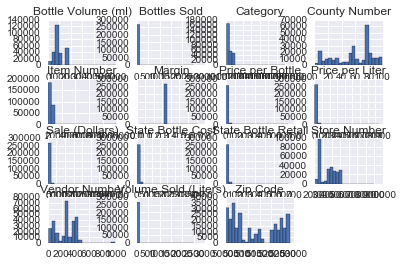

In [721]:
df.hist(bins=20)

In [722]:
df[df['Margin']>0.34]['Margin'].max()

0.7142857142857143

In [723]:
df[df['Margin']>0.7]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Margin,Price per Bottle,Price per Liter
110306,2015-10-01,5102,MOUNT VERNON,52314,57,LINN,1081700,DISTILLED SPIRITS SPECIALTY,346,86748,OLE SMOKY BLACKBERRY MOONSHINE,750,2.2,7.7,6,46.2,4.5,0.714286,7.7,10.266667


some margin anomarlies

# Now doing the store data dataframe

In [724]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
from sklearn.cross_validation import cross_val_predict, cross_val_score

In [725]:
df['Date'].min()

Timestamp('2015-01-05 00:00:00')

In [726]:
df['Date'].max()

Timestamp('2016-03-31 00:00:00')

In [727]:
# Store info for all

# Filter by our start and end dates
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20161231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales = df[mask]

# Group by store name
sales = sales.groupby(by=["Store Number"], as_index=False)
# Compute sums, means
sales = sales.agg({"Zip Code": {'' : lambda x: x.iloc[0]}, # just extract once, should be the same
                   "City": {'' : lambda x: x.iloc[0]},
                   "County Number": {'' : lambda x: x.iloc[0]},
                   "Date" : {'first' : np.min, 'last' : np.max}
                  })
# Collapse the column indices

sales.columns = [' '.join(col).strip() for col in sales.columns.values]
# Rename columns

# Quick check
sales.head()

,Store Number,Date last,Date first,City,County Number,Zip Code
0,2106,2016-03-31,2015-01-08,CEDAR FALLS,7,50613
1,2113,2016-03-23,2015-01-07,GOWRIE,94,50543
2,2130,2016-03-31,2015-01-08,WATERLOO,7,50703
3,2152,2016-03-17,2015-01-08,ROCKWELL,17,50469
4,2178,2016-03-30,2015-01-07,WAUKON,3,52172


In [728]:
def sales_per_store_df(date_from, date_to, label) :

    # Filter by our start and end dates
    df.sort_values(by=["Store Number", "Date"], inplace=True)
    start_date = pd.Timestamp(date_from)
    end_date = pd.Timestamp(date_to)
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    sales_temp = df[mask]

    # Group by store name
    sales_temp = sales_temp.groupby(by=["Store Number"], as_index=False)
    # Compute sums, means
    sales_temp = sales_temp.agg({"Sale (Dollars)": {'sum': np.sum, 'mean':np.mean},
                   "Volume Sold (Liters)": {'sum': np.sum, 'mean':np.mean},
                   "Margin": {'mean':np.mean},
                   "Price per Liter": {'mean':np.mean},
                   "Date": {'open': lambda x: len(np.unique(x))},
                   "Category Name": {'': lambda x: x.value_counts().sort_values(ascending=False).index[0]},
                   "Bottles Sold": {'sum': np.sum},
                   "Price per Bottle": {'mean':np.mean}
                   })
    # Collapse the column indices

    sales_temp.columns = [' '.join(col).strip() for col in sales_temp.columns.values]
    # Rename columns
    sales_temp = sales_temp.reindex(columns=["Store Number", "Sale (Dollars) sum", "Sale (Dollars) mean", 
                                             "Volume Sold (Liters) sum", 
                                            "Volume Sold (Liters) mean", "Margin mean", "Price per Liter mean", 
                                            "Date open", "Category Name", "Bottles Sold sum", "Price per Bottle mean"])
    # Quick check
    sales_temp.columns = ['Store Number', label + ' Sale (Dollars) sum',
           label + ' Sale (Dollars) mean', 
           label + ' Volume Sold (Liters) sum', 
           label + ' Volume Sold (Liters) mean', label + ' Margin mean',
           label + ' Price per Liter mean', label + ' days open', label + ' most fav category',
           label + ' Bottles Sold sum', label + ' Price per Bottle mean' ]
    
    sales_temp[label + ' days open'] = sales_temp[label + ' days open'].astype(int)
    sales_temp2 = df.groupby(by=["Store Number", 'Date'], as_index=False)['Sale (Dollars)'].mean()
    sales_temp2 = sales_temp2.groupby(by='Store Number')[['Sale (Dollars)']].mean()
    sales_temp2.columns = [label + ' average sales per day']
    
    return pd.merge(sales_temp, sales_temp2, how='left', left_on='Store Number', right_index=True)

In [729]:
sales_2015 = sales_per_store_df('20150101','20151231','2015')

In [730]:
sales_2015.head()

,Store Number,2015 Sale (Dollars) sum,2015 Sale (Dollars) mean,2015 Volume Sold (Liters) sum,2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Price per Liter mean,2015 days open,2015 most fav category,2015 Bottles Sold sum,2015 Price per Bottle mean,2015 average sales per day
0,2106,146038.70,277.640114,9719.85,18.478802,0.334048,17.844997,52,VODKA 80 PROOF,10355,15.459734,268.434481
1,2113,9310.22,63.334830,659.85,4.488776,0.333929,18.507700,47,CANADIAN WHISKIES,671,16.315646,57.960346
2,2130,111583.91,285.380844,6879.37,17.594297,0.333779,16.817589,52,CANADIAN WHISKIES,7418,14.740767,288.405484
3,2152,7721.08,54.759433,633.37,4.491986,0.335237,13.020765,49,CANADIAN WHISKIES,573,12.887660,58.257655
4,2178,24324.18,102.633671,1917.12,8.089114,0.334659,16.053844,51,CANADIAN WHISKIES,1928,14.558692,107.775142


In [731]:
sales_temp = sales_per_store_df('20150101','20151231','2015')
sales_all = pd.merge(sales,sales_2015,how='left', on='Store Number')

In [732]:
sales_temp = sales_per_store_df('20150101','20150331','2015 Q1')
sales_all = pd.merge(sales_all,sales_temp,how='left', on='Store Number')

In [733]:
sales_temp = sales_per_store_df('20160101','20160331','2016 Q1')
sales_all = pd.merge(sales_all,sales_temp,how='left', on='Store Number')

In [734]:
sales_clean = sales_all[(sales_all['Date first']<=pd.Timestamp("20151231")) & (sales_all['Date last']>=pd.Timestamp("20160101"))]

In [735]:
sales_clean.columns

Index([u'Store Number', u'Date last', u'Date first', u'City', u'County Number',
       u'Zip Code', u'2015 Sale (Dollars) sum', u'2015 Sale (Dollars) mean',
       u'2015 Volume Sold (Liters) sum', u'2015 Volume Sold (Liters) mean',
       u'2015 Margin mean', u'2015 Price per Liter mean', u'2015 days open',
       u'2015 most fav category', u'2015 Bottles Sold sum',
       u'2015 Price per Bottle mean', u'2015 average sales per day',
       u'2015 Q1 Sale (Dollars) sum', u'2015 Q1 Sale (Dollars) mean',
       u'2015 Q1 Volume Sold (Liters) sum',
       u'2015 Q1 Volume Sold (Liters) mean', u'2015 Q1 Margin mean',
       u'2015 Q1 Price per Liter mean', u'2015 Q1 days open',
       u'2015 Q1 most fav category', u'2015 Q1 Bottles Sold sum',
       u'2015 Q1 Price per Bottle mean', u'2015 Q1 average sales per day',
       u'2016 Q1 Sale (Dollars) sum', u'2016 Q1 Sale (Dollars) mean',
       u'2016 Q1 Volume Sold (Liters) sum',
       u'2016 Q1 Volume Sold (Liters) mean', u'2016 Q1 Margin

In [736]:
sales_clean.isnull().sum()

Store Number                          0
Date last                             0
Date first                            0
City                                  0
County Number                         0
Zip Code                              0
2015 Sale (Dollars) sum               0
2015 Sale (Dollars) mean              0
2015 Volume Sold (Liters) sum         0
2015 Volume Sold (Liters) mean        0
2015 Margin mean                      0
2015 Price per Liter mean             0
2015 days open                        0
2015 most fav category                0
2015 Bottles Sold sum                 0
2015 Price per Bottle mean            0
2015 average sales per day            0
2015 Q1 Sale (Dollars) sum           97
2015 Q1 Sale (Dollars) mean          97
2015 Q1 Volume Sold (Liters) sum     97
2015 Q1 Volume Sold (Liters) mean    97
2015 Q1 Margin mean                  97
2015 Q1 Price per Liter mean         97
2015 Q1 days open                    97
2015 Q1 most fav category            97


Okay, let's get rid of the non existed 2015 Q1 stores

In [737]:
sales_clean = sales_clean.dropna()

In [738]:
pd.options.display.max_columns = 999

In [739]:
sales_clean.head()

,Store Number,Date last,Date first,City,County Number,Zip Code,2015 Sale (Dollars) sum,2015 Sale (Dollars) mean,2015 Volume Sold (Liters) sum,2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Price per Liter mean,2015 days open,2015 most fav category,2015 Bottles Sold sum,2015 Price per Bottle mean,2015 average sales per day,2015 Q1 Sale (Dollars) sum,2015 Q1 Sale (Dollars) mean,2015 Q1 Volume Sold (Liters) sum,2015 Q1 Volume Sold (Liters) mean,2015 Q1 Margin mean,2015 Q1 Price per Liter mean,2015 Q1 days open,2015 Q1 most fav category,2015 Q1 Bottles Sold sum,2015 Q1 Price per Bottle mean,2015 Q1 average sales per day,2016 Q1 Sale (Dollars) sum,2016 Q1 Sale (Dollars) mean,2016 Q1 Volume Sold (Liters) sum,2016 Q1 Volume Sold (Liters) mean,2016 Q1 Margin mean,2016 Q1 Price per Liter mean,2016 Q1 days open,2016 Q1 most fav category,2016 Q1 Bottles Sold sum,2016 Q1 Price per Bottle mean,2016 Q1 average sales per day
0,2106,2016-03-31,2015-01-08,CEDAR FALLS,7,50613,146038.70,277.640114,9719.85,18.478802,0.334048,17.844997,52.0,VODKA 80 PROOF,10355.0,15.459734,268.434481,39287.29,304.552636,2526.10,19.582171,0.334122,17.846608,12.0,VODKA 80 PROOF,2705.0,15.075271,268.434481,30478.75,241.894841,2116.25,16.795635,0.334159,17.969769,13.0,VODKA 80 PROOF,2218.0,15.559921,268.434481
1,2113,2016-03-23,2015-01-07,GOWRIE,94,50543,9310.22,63.334830,659.85,4.488776,0.333929,18.507700,47.0,CANADIAN WHISKIES,671.0,16.315646,57.960346,2833.25,67.458333,177.11,4.216905,0.333455,19.365167,11.0,CANADIAN WHISKIES,196.0,15.821190,57.960346,2065.90,55.835135,177.00,4.783784,0.333959,17.483024,12.0,CANADIAN WHISKIES,159.0,16.077297,57.960346
2,2130,2016-03-31,2015-01-08,WATERLOO,7,50703,111583.91,285.380844,6879.37,17.594297,0.333779,16.817589,52.0,CANADIAN WHISKIES,7418.0,14.740767,288.405484,24272.57,278.995057,1447.25,16.635057,0.333877,17.565430,12.0,CANADIAN WHISKIES,1533.0,15.401379,288.405484,27856.11,238.086410,1556.90,13.306838,0.333466,17.452157,13.0,CANADIAN WHISKIES,1726.0,15.932308,288.405484
3,2152,2016-03-17,2015-01-08,ROCKWELL,17,50469,7721.08,54.759433,633.37,4.491986,0.335237,13.020765,49.0,CANADIAN WHISKIES,573.0,12.887660,58.257655,2003.46,62.608125,151.74,4.741875,0.334215,13.993430,12.0,CANADIAN WHISKIES,154.0,14.460938,58.257655,1376.43,45.881000,140.13,4.671000,0.334531,12.517597,10.0,CANADIAN WHISKIES,136.0,12.711667,58.257655
4,2178,2016-03-30,2015-01-07,WAUKON,3,52172,24324.18,102.633671,1917.12,8.089114,0.334659,16.053844,51.0,CANADIAN WHISKIES,1928.0,14.558692,107.775142,5856.41,122.008542,409.81,8.537708,0.334556,16.705494,12.0,SPICED RUM,490.0,14.748542,107.775142,5588.50,96.353448,520.80,8.979310,0.334574,15.101929,13.0,VODKA 80 PROOF,480.0,13.915345,107.775142


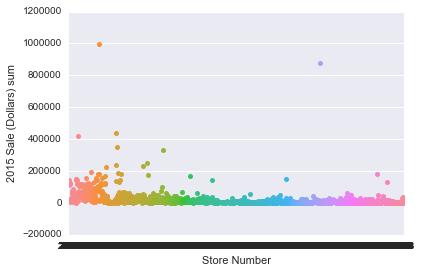

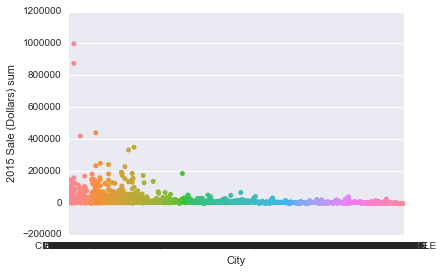

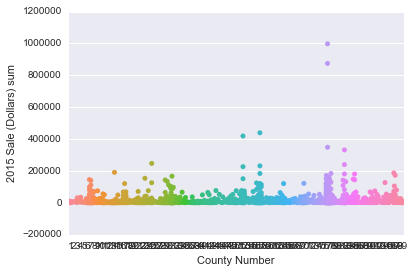

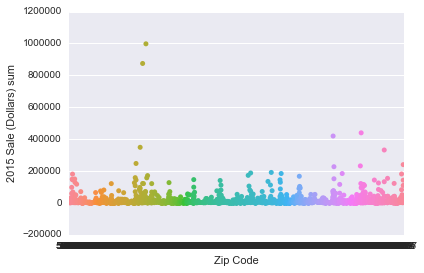

In [740]:
import seaborn as sns
from matplotlib import pyplot as plt

# There are many valid solutions.

# For the numerical variables
for column in ["Store Number", "City", "County Number", "Zip Code"]:
    sns.swarmplot(x=column, y="2015 Sale (Dollars) sum", data=sales_all)
    sns.plt.show()

### From the above, with further analysis, we can find which City and Zip Code areas consume the most and then see how those stores in those areas perform. If the sales for those stores are huge, we can introduce new stores there to grab markets.

In [741]:
sales_clean['2015 Margin mean'].describe()

count    1179.000000
mean        0.334328
std         0.000780
min         0.332062
25%         0.333786
50%         0.334208
75%         0.334636
max         0.340447
Name: 2015 Margin mean, dtype: float64

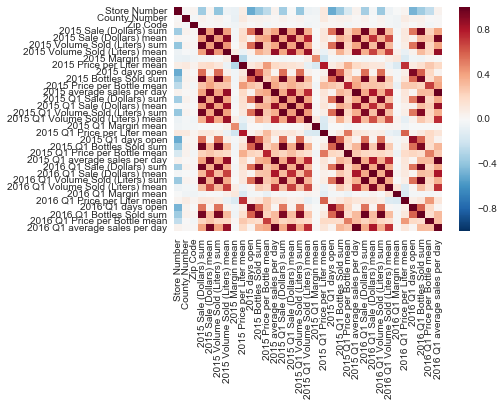

In [742]:
sns.heatmap(sales_clean.corr())

In [743]:
sales_2015_q1 = sales_per_store_df('20150101','20150331','2015 Q1')

In [744]:
def findCorrelation(df, threshold=0.75):
    cor = df.corr()
    cor.loc[:,:] = np.tril(cor.values, k=-1)
#     print cor.head(10)
    cor = cor.stack()
#     print cor.head(10)
    return cor[abs(cor) > threshold]

In [745]:
findCorrelation(sales_2015_q1)

2015 Q1 Volume Sold (Liters) sum   2015 Q1 Sale (Dollars) sum          0.986577
2015 Q1 Volume Sold (Liters) mean  2015 Q1 Sale (Dollars) mean         0.884981
2015 Q1 Bottles Sold sum           2015 Q1 Sale (Dollars) sum          0.985844
                                   2015 Q1 Volume Sold (Liters) sum    0.984136
2015 Q1 average sales per day      2015 Q1 Sale (Dollars) mean         0.869808
dtype: float64

We will likely use these.

2015 Q1 Sale (Dollars) sum
2015 Q1 Volume Sold (Liters) mean
2015 Q1 Price per Liter mean
2015 Q1 days open
2015 Q1 Price per Bottle mean



# Modelling begins.

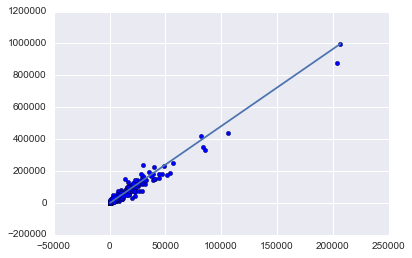

In [746]:
plt.scatter(sales_clean['2015 Q1 Sale (Dollars) sum'], sales_clean['2015 Sale (Dollars) sum'])
plt.plot((min(sales_clean['2015 Sale (Dollars) sum']), max(sales_clean['2015 Q1 Sale (Dollars) sum'])), 
         (min(sales_clean['2015 Sale (Dollars) sum']), max(sales_clean['2015 Sale (Dollars) sum'])))

Looks very linear to me for that one X feature vs y.

In [747]:
% matplotlib inline

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10

In [748]:
from sklearn.cross_validation import cross_val_score, cross_val_predict, KFold
from sklearn import metrics
from scipy import stats
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn import pipeline

cv = KFold(len(df), 10)

In [749]:
sales_clean.columns

Index([u'Store Number', u'Date last', u'Date first', u'City', u'County Number',
       u'Zip Code', u'2015 Sale (Dollars) sum', u'2015 Sale (Dollars) mean',
       u'2015 Volume Sold (Liters) sum', u'2015 Volume Sold (Liters) mean',
       u'2015 Margin mean', u'2015 Price per Liter mean', u'2015 days open',
       u'2015 most fav category', u'2015 Bottles Sold sum',
       u'2015 Price per Bottle mean', u'2015 average sales per day',
       u'2015 Q1 Sale (Dollars) sum', u'2015 Q1 Sale (Dollars) mean',
       u'2015 Q1 Volume Sold (Liters) sum',
       u'2015 Q1 Volume Sold (Liters) mean', u'2015 Q1 Margin mean',
       u'2015 Q1 Price per Liter mean', u'2015 Q1 days open',
       u'2015 Q1 most fav category', u'2015 Q1 Bottles Sold sum',
       u'2015 Q1 Price per Bottle mean', u'2015 Q1 average sales per day',
       u'2016 Q1 Sale (Dollars) sum', u'2016 Q1 Sale (Dollars) mean',
       u'2016 Q1 Volume Sold (Liters) sum',
       u'2016 Q1 Volume Sold (Liters) mean', u'2016 Q1 Margin

# Let's do the numerical ones first.

In [750]:
numeric_cols = [u'2015 Q1 Sale (Dollars) sum', u'2015 Q1 Sale (Dollars) mean',
       u'2015 Q1 Volume Sold (Liters) sum',
       u'2015 Q1 Volume Sold (Liters) mean', u'2015 Q1 Margin mean',
       u'2015 Q1 Price per Liter mean', u'2015 Q1 days open',
       u'2015 Q1 Bottles Sold sum',
       u'2015 Q1 Price per Bottle mean', u'2015 Q1 average sales per day']
X = sales_clean[numeric_cols]#, '2015 Q1 Volume Sold (Liters) sum']]
y = sales_clean['2015 Sale (Dollars) sum']


In [751]:
numeric_cols_pure = [l.replace('2015 Q1 ','') for l in numeric_cols]

In [752]:
X.head()

,2015 Q1 Sale (Dollars) sum,2015 Q1 Sale (Dollars) mean,2015 Q1 Volume Sold (Liters) sum,2015 Q1 Volume Sold (Liters) mean,2015 Q1 Margin mean,2015 Q1 Price per Liter mean,2015 Q1 days open,2015 Q1 Bottles Sold sum,2015 Q1 Price per Bottle mean,2015 Q1 average sales per day
0,39287.29,304.552636,2526.10,19.582171,0.334122,17.846608,12.0,2705.0,15.075271,268.434481
1,2833.25,67.458333,177.11,4.216905,0.333455,19.365167,11.0,196.0,15.821190,57.960346
2,24272.57,278.995057,1447.25,16.635057,0.333877,17.565430,12.0,1533.0,15.401379,288.405484
3,2003.46,62.608125,151.74,4.741875,0.334215,13.993430,12.0,154.0,14.460938,58.257655
4,5856.41,122.008542,409.81,8.537708,0.334556,16.705494,12.0,490.0,14.748542,107.775142


In [753]:
X.shape

(1179, 10)

I am lazy and decided to use SelectFromModel for features.

In [754]:
lm_LassoCV = linear_model.LassoCV(cv=10).fit(X, y)
model = SelectFromModel(lm_LassoCV, prefit=True)
X_new = model.transform(X)
X_new.shape

(1179, 1)

In [755]:
cols_selected = [ col   for col, coef in zip(X.columns,lm_LassoCV.coef_) if coef!=0]

In [756]:
X = X[cols_selected]

# LinearRegression vs RidgeCV

Score: 0.862169996889


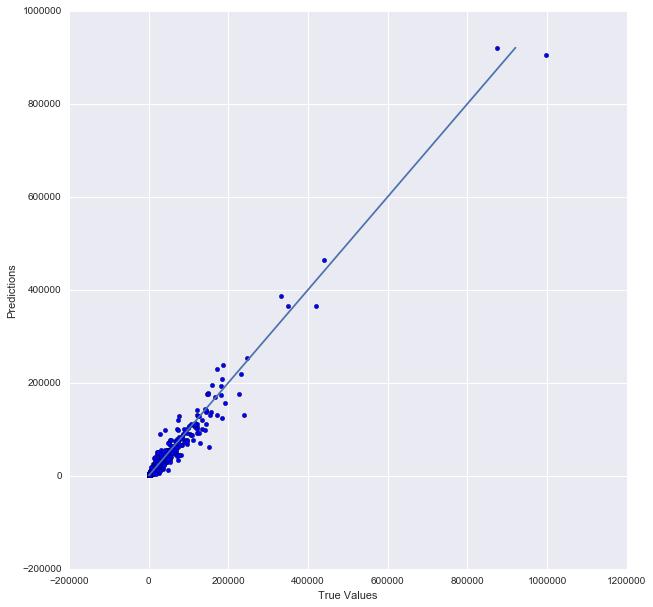

Ridge Score: 0.862099285689


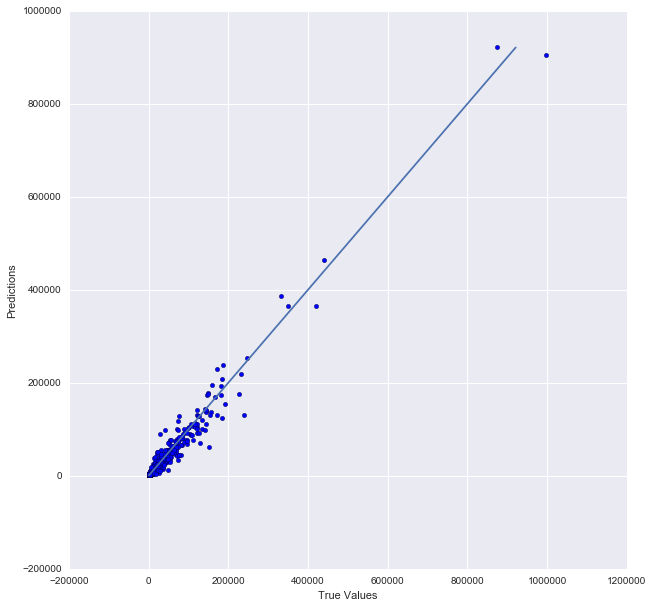

In [757]:
lm = linear_model.LinearRegression()

#model = lm.fit(X_train, y_train)
#predictions = lm.predict(X_test)

predictions = cross_val_predict(lm, X, y, cv=10)

## The line / model
plt.scatter(y, predictions)
plt.plot((min(predictions), max(predictions)), (min(predictions), max(predictions)))
plt.xlabel("True Values")
plt.ylabel("Predictions")
print "Score:", np.mean(cross_val_score(lm, X, y, cv=10))
#print "Test Score:", model.score(X_test, y_test) 
plt.show()



lm = linear_model.RidgeCV()
predictions = cross_val_predict(lm, X, y, cv=10)

#model = lm.fit(X_train, y_train)
#predictions = lm.predict(X_test)

## The line / model
plt.scatter(y, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot((min(predictions), max(predictions)), (min(predictions), max(predictions)))
print "Ridge Score:", np.mean(cross_val_score(lm, X, y, cv=10))
#print "Ridge Test Score:", model.score(X_test, y_test) 
plt.show()

In [758]:
lm = linear_model.RidgeCV()
#predictions = cross_val_predict(lm, X, y, cv=10)

model = lm.fit(X, y)

col_strip_date = [l.replace('2015 Q1 ','') for l in X.columns]
X_pred_cols = [ '2016 Q1 ' + col if col in numeric_cols_pure else col for col in col_strip_date ]
temp_df = pd.concat([sales_clean, dummies_set], axis=1) # add back the dummies columns

new_X = temp_df[X_pred_cols] #,'2016 Q1 Volume Sold (Liters) sum']
#new_X = pd.concat([new_X, X[X.columns[len(numeric_cols):]]], axis=1)
#new_X.head()                   

predictions = lm.predict(new_X)

In [759]:
sales_clean['2015 Sale (Dollars) sum'].sum()

27368410.080000024

In [760]:
predictions.sum()

27752689.444735561

# OK, let's do with the categorical variables too!

In [761]:
numeric_cols = [u'2015 Q1 Sale (Dollars) sum', u'2015 Q1 Sale (Dollars) mean',
       u'2015 Q1 Volume Sold (Liters) sum',
       u'2015 Q1 Volume Sold (Liters) mean', u'2015 Q1 Margin mean',
       u'2015 Q1 Price per Liter mean', u'2015 Q1 days open',
       u'2015 Q1 Bottles Sold sum',
       u'2015 Q1 Price per Bottle mean', u'2015 Q1 average sales per day']
X = sales_clean[numeric_cols]#, '2015 Q1 Volume Sold (Liters) sum']]
y = sales_clean['2015 Sale (Dollars) sum']


categories = ['City', 'County Number', 'Zip Code']
dummies_set = pd.DataFrame()
for cat in categories :
    series = sales_clean[cat]
    dummies = pd.get_dummies(series, prefix=cat)
    dummies_set = pd.concat([dummies_set, dummies], axis=1)
X = pd.concat([X, dummies_set], axis=1)    


lm_LassoCV = linear_model.LassoCV(cv=10).fit(X, y)
model = SelectFromModel(lm_LassoCV, prefit=True)
X_new = model.transform(X)


cols_selected = [ col   for col, coef in zip(X.columns,lm_LassoCV.coef_) if coef!=0]

X = X[cols_selected]

In [762]:
X.shape

(1179, 1)

Score: 0.862169996889


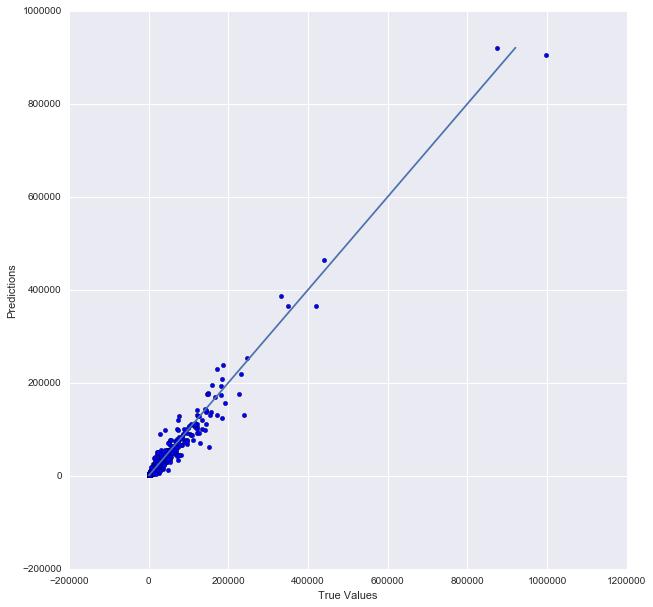

Ridge Score: 0.862099285689


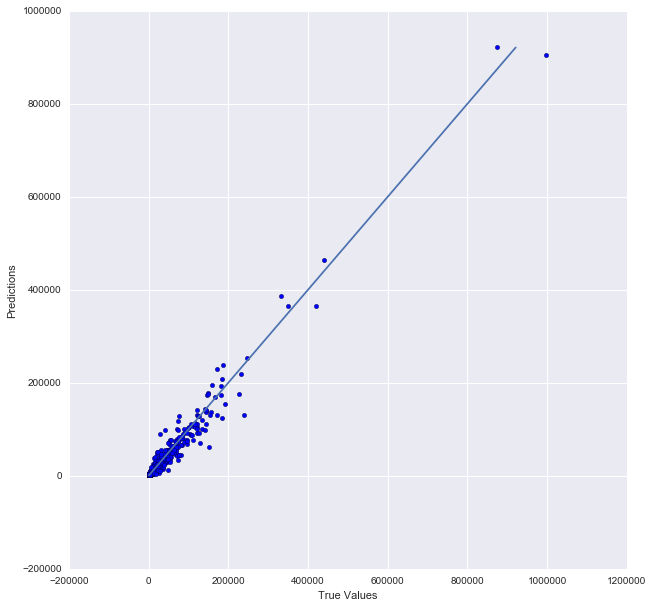

In [763]:
lm = linear_model.LinearRegression()

predictions = cross_val_predict(lm, X, y, cv=10)

## The line / model
plt.scatter(y, predictions)
plt.plot((min(predictions), max(predictions)), (min(predictions), max(predictions)))
plt.xlabel("True Values")
plt.ylabel("Predictions")
print "Score:", np.mean(cross_val_score(lm, X, y, cv=10))
#print "Test Score:", model.score(X_test, y_test) 
plt.show()



lm = linear_model.RidgeCV()
predictions = cross_val_predict(lm, X, y, cv=10)

#model = lm.fit(X_train, y_train)
#predictions = lm.predict(X_test)

## The line / model
plt.scatter(y, predictions)
plt.plot((min(predictions), max(predictions)), (min(predictions), max(predictions)))
plt.xlabel("True Values")
plt.ylabel("Predictions")
print "Ridge Score:", np.mean(cross_val_score(lm, X, y, cv=10))
#print "Ridge Test Score:", model.score(X_test, y_test) 
plt.show()

In [764]:
lm = linear_model.RidgeCV()
#predictions = cross_val_predict(lm, X, y, cv=10)

model = lm.fit(X, y)

col_strip_date = [l.replace('2015 Q1 ','') for l in X.columns]
X_pred_cols = [ '2016 Q1 ' + col if col in numeric_cols_pure else col for col in col_strip_date ]
temp_df = pd.concat([sales_clean, dummies_set], axis=1) # add back the dummies columns

new_X = temp_df[X_pred_cols] #,'2016 Q1 Volume Sold (Liters) sum']
#new_X = pd.concat([new_X, X[X.columns[len(numeric_cols):]]], axis=1)
#new_X.head()                   

predictions = lm.predict(new_X)

In [765]:
sales_clean['2015 Sale (Dollars) sum'].sum()

27368410.080000024

In [766]:
predictions.sum()

27752689.444735561

# Well, using LassoCV gives us just one X and killed all the categorical variables. We have 27,368,410 total sales in 2015 and predicted 27,752,689 total sales in 2016.

## Trying this new LassoLarsCV for SelectFromModel now

In [767]:
numeric_cols = [u'2015 Q1 Sale (Dollars) sum', u'2015 Q1 Sale (Dollars) mean',
       u'2015 Q1 Volume Sold (Liters) sum',
       u'2015 Q1 Volume Sold (Liters) mean', u'2015 Q1 Margin mean',
       u'2015 Q1 Price per Liter mean', u'2015 Q1 days open',
       u'2015 Q1 Bottles Sold sum',
       u'2015 Q1 Price per Bottle mean', u'2015 Q1 average sales per day']
X = sales_clean[numeric_cols]#, '2015 Q1 Volume Sold (Liters) sum']]
y = sales_clean['2015 Sale (Dollars) sum']


categories = ['City', 'County Number', 'Zip Code']
dummies_set = pd.DataFrame()
for cat in categories :
    series = sales_clean[cat]
    dummies = pd.get_dummies(series, prefix=cat)
    dummies_set = pd.concat([dummies_set, dummies], axis=1)
X = pd.concat([X, dummies_set], axis=1)    


lm_LassoCV = linear_model.LassoLarsCV(cv=10).fit(X, y)
model = SelectFromModel(lm_LassoCV, prefit=True)
X_new = model.transform(X)


cols_selected = [ col   for col, coef in zip(X.columns,lm_LassoCV.coef_) if coef!=0]

X = X[cols_selected]
X.shape

(1179, 27)

In [768]:
lm = linear_model.LinearRegression()

predictions = cross_val_predict(lm, X, y, cv=10)

## The line / model

print "Score:", np.mean(cross_val_score(lm, X, y, cv=10))
#print "Test Score:", model.score(X_test, y_test) 



lm = linear_model.RidgeCV()
predictions = cross_val_predict(lm, X, y, cv=10)



## The line / model

print "Ridge Score:", np.mean(cross_val_score(lm, X, y, cv=10))
#print "Ridge Test Score:", model.score(X_test, y_test) 


Score: 0.754448113835
Ridge Score: 0.812398251852


## Oh well, more variables for LassoLarsCV - 27 but worse score

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

Did all that, and this became a dataframe and data cleaning exercise. Model works best for just 2015 Q1 sales to predict 2016.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

many variables are very correlated to each other as shown above

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

It is too good a predictor and it became the only one. Well, usually store sales would not deviate much as time progresses especially for averages of many stores. So this somehow became recursive.

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

I tried SelectModel and use LassoCV and got just one variable back. If I use LassoCV I got 27 features but worse score. Ironically 2015 Q1 is best for predicting rest of the year 2015 which is probably most people do.